# Intro to PCA

Principal component analysis (PCA) and singular value decomposition (SVD) are commonly used dimensionality reduction approaches in exploratory data analysis (EDA) and Machine Learning.

PCA aims to find linearly uncorrelated orthogonal axes, which are also known as principal components (PCs) in the dimensional space to project the data points onto those PCs. The first PC captures the largest variance in the data. 

The gif below explains that. The  2 original axes have a high correlation. We will apply rotations in this axis and find a new set of the axis where this correlation vanishes. 

<img src="images/1_XGaA7KWUlhWZLIezYEBIHA.gif"  width="800" height="800">

Comparison with Fouries recnstruction of the signal


| item                                                         | Fourier reconstruction of signal | PCA reconstructions         |
|------------------------------------------------------------- | -------------------------------- | ----------------------------|
| building blocks                                              | sines n cosines                  | eigen-vectors               |
| properties of the blocks                                     | orthogonal                       | linear uncorrelated         |
| coefficient (gives the importance of the eigen-vector/sines) | amplitude (A)                    | eigen-value ( $\lambda $)  |
| variance explained                                           | $\sum A_k^2 $                   | $\sum \lambda_k $       |
| applications                                                 | filter/dimension reduction       | filters/dimension reduction |



refs:

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


## Explanation to layman

It is a good analogy


```txt

It's just a method of summarizing some data. 

We can describe each wine by its colour, by how strong it is, by how old it is, and so on. We can compose a whole list of different characteristics of each wine in our cellar. But many of them will measure related properties and some will be redundant. If so, we should be able to summarize each wine with fewer characteristics as possible! This is what PCA does.

So this PCA thing checks what characteristics  (features) are redundant and discards them?

PCA is not selecting some characteristics and discarding the others. Instead, it constructs some new characteristics that turn out to summarize our list of wines well. Of course these new characteristics are constructed using the old ones; for example, a new characteristic might be computed as wine age minus wine acidity level or some other combination like that (we call them linear combinations)

What do you actually mean when you say that these new PCA characteristics "summarize" the list of wines?

First answer is that you are looking for some wine properties (characteristics) that strongly differ across wines. Indeed, imagine that you come up with a property that is the same for most of the wines. This would not be very useful, wouldn't it? Wines are very different, but your new property makes them all look the same! This would certainly be a bad summary. Instead, PCA looks for properties that show as much variation across wines as possible.


The second answer is that you look for the properties that would allow you to predict, or "reconstruct", the original wine characteristics. So PCA looks for properties that allow to reconstruct the original characteristics as well as possible.


PCA will find the "best" line according to two different criteria of what is the "best". First, the variation of values along this line should be maximal. At the same time find the line that minimize the reconstruction error. 

If you stare at this animation for some time, you will notice that "the maximum variance" and "the minimum error" are reached at the same time, 

```

## Steps overview


1. Compute the covariance matrix
2. Compute the eigen-vectors and eigen-values of the covariance matrix 


\begin{equation*}
C = \frac{XX^{T}}{(n-1)}
\end{equation*}

Ex: of covariance matrix

\begin{equation*}
\begin{bmatrix}
    1.07     &  0.63  \\
    0.63    & 0.64
\end{bmatrix}
\end{equation*}

What this means is that the variance of the x variable is 1.07, the variance of the y variable is 0.64, and the covariance between them is 0.63.

After all, the geometrical meaning of eigen decomposition is to find a new coordinate system of the eigenvectors for C through rotations.


\begin{equation*}
C = U \Lambda U^{-1}
\end{equation*}

Where $\Lambda$ is a diagonal matrix and its elements are the eigen-values $\lambda_i$ and U is a matrix where its columns are the eigen-vetors $u_i$. The eigen-vetctors are orthonormal basis of the covariance matrix. The eigen-vectors are called the principal components and **the eigenvalues are the variances in the new independent coordinate frame** (If you compute the covariance matrix od the data in the new set of axis defined by the eigen-vectors you will find the eigen-values )


We can then use matrix multiplication to project the data onto the PC space. For the purpose of dimensionality reduction, we can project the data points onto the first k PCs (eigen-vectors was sorted by their eigen-values) as the representation of the data:

\begin{equation*}
X'_{nxk} = [X_{nxd}]_k U_{kxk}
\end{equation*}

where $k < d$ and $[X_{nxd}]_k$ mean youonly considered the k dimensions. An alternative should make all the others eigen-values zero and then the eigen-vectors matrix W is dxd


## Implementaion

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# diplsay image side by side
from IPython.display import HTML, display


_figsize=[8,6]

In [5]:
def pca(X):

    # Data matrix X, assumes 0-centered
    n, m = X.shape
    assert np.allclose(X.mean(axis=0), np.zeros(m))
    
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    
    # Eigen decomposition
    # \lambdas     U
    eigen_vals, eigen_vecs = np.linalg.eig(C)

    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)

    return X_pca, eigen_vals, eigen_vecs


## Creating fake data

(50, 2)

Show the data


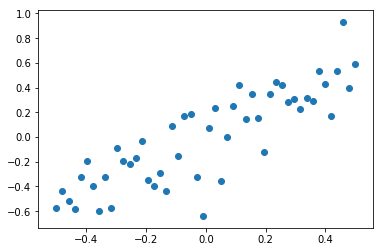

In [7]:
n = 50
x = np.linspace(0.0, 1.0, num=n)
y = 1.2*x + np.random.normal(0.0,0.2,50)

x = x - np.mean(x)
y = y - np.mean(y)

X = np.array([x,y]).T
#X = X - X.mean(axis=0)
X.shape

print('Show the data')
plt.scatter(x,y)
plt.xlim=(-0.5,0.5)
plt.ylim=(-1.0,1.0)

* **Undertanding/checking the covariance matrix**

In [8]:
# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)
C
C0 = C

print('Uderstand the covariance matrix')
print('The diagonals should be the varince in each axis')
np.var(X[:,0],ddof=1)
np.var(X[:,1],ddof=1)


array([[0.08850479, 0.09678979],
       [0.09678979, 0.14679519]])

Uderstand the covariance matrix
The diagonals should be the varince in each axis


0.08850478967097042

0.1467951874241493

## Compute PCA 

In [9]:
X_pca, eigen_vals, eigen_vecs = pca(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlim =(-0.5,0.5)
plt.ylim=(-1.0,1.0)

* **Checking pca properties**

1. Comparing convaricance matyrix after and before
2. Checks eigen values are the variance of the new covariance matrix (diagonal)
3. Show the total variance is constant

In [10]:
# Compute covariance matrix
C = np.dot(X_pca.T, X_pca) / (n-1)

print('eigen vectors')
eigen_vecs

print('Comparing covariance matrix before and after pca')
print(C0)
print()
print(C)

print()
print('comparing the eigen values with the variances')
print('The eigen valus are in the diagonal of the new cov matrix')
print('the eigen values are the variance in the new axis')
print(eigen_vals)

# The eigen values should be equal to the variances below
# ddof = 1 tels to divide by N-1 instead of N
np.var(X_pca[:,0],ddof=1)
np.var(X_pca[:,1],ddof=1) 

print()
print('The variance explained')
np.sum(eigen_vals)
np.sum(np.trace(C0))
np.sum(np.trace(C))

print('The product of eigen values are the determinant of the covariance matrix')
np.linalg.det(C)
np.linalg.det(C0)
np.prod(eigen_vals)

eigen vectors


array([[-0.802599  , -0.59651894],
       [ 0.59651894, -0.802599  ]])

Comparing covariance matrix before and after pca
[[0.08850479 0.09678979]
 [0.09678979 0.14679519]]

[[ 1.65673153e-02 -5.66440319e-18]
 [-5.66440319e-18  2.18732662e-01]]

comparing the eigen values with the variances
The eigen valus are in the diagonal of the new cov matrix
the eigen values are the variance in the new axis
[0.01656732 0.21873266]


0.016567315323514475

0.21873266177160527


The variance explained


0.2352999770951197

0.2352999770951197

0.23529997709511974

The product of eigen values are the determinant of the covariance matrix


0.003623812979121826

0.0036238129791218193

0.003623812979121822

## The difference between OLS (Least square) n PCA (**very important**)

Very nice discussion

**Least square minimize the distance in the y n x direction**

* left y ~ x 
* right x ~ y

In [14]:
display(HTML("<table><tr><td><img src='images/ozqBY.png'></td><td><img src='images/pHbub.png'></td></tr></table>"))

,


**While PCA minize the distance orthogonal to the line**

<img src="images/bOl5N.png"  width="300" height="300">


1.0936108010370118 -1.9626155733547183e-17


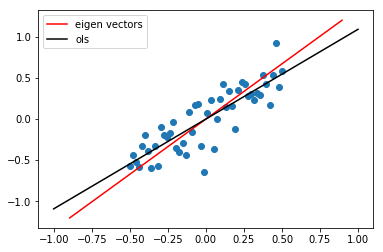

In [15]:
# Solving OLS with numpy y = m x+ c + e
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
x0 = 1.0
x_ols = [-x0, x0]
y_ols = [-m*x0 + c, m*x0 + c]


u1 = eigen_vecs.T[0]
u2 = eigen_vecs.T[1]

x1 = np.array([-u2[0],u2[0]])*1.5
y1 = np.array([-u2[1],u2[1]])*1.5

plt.scatter(x,y)
plt.plot(x1,y1,c='r',label='eigen vectors')
plt.plot(x_ols,y_ols,c='k',label='ols')
plt.xlim=(-0.5,0.5)
plt.ylim=(-1.0,1.0)
plt.legend()

### Comparison with SVD


PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices. 

Most implementations of PCA actually use performs SVD under the hood rather than doing eigen decomposition on the covariance matrix because SVD can be much more efficient and is able to handle sparse matrices. In addition, there are reduced forms of SVD which are even more economic to compute.


We can look into their relationship by performing SVD on the covariance matrix C


Decompose X using SVD
\begin{equation*}
X = V \Sigma U^T \\
C = \frac{U \Sigma V^T V \Sigma  U^T}{n-1} \\
C = U \frac{\Sigma^2}{n-1} U^T \\
C = U \frac{\Sigma^2}{n-1} U^{-1}
\end{equation*}

Because the eigenvector matrix U is unitary 

comparing with 

\begin{equation*}
C = U \Lambda U^{-1}
\end{equation*}

We have

\begin{equation*}
\Lambda = \frac{\Sigma^2}{n-1}
\end{equation*}


In [17]:
# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)

# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)

# SVD
V, Sigma, Uh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)


* **cheking SVD n PCA relationship**



* $ U^{-1} = U^T$

* $\Sigma$ and $\Lambda$

\begin{equation*}
\Lambda = \frac{\Sigma^2}{n-1}
\end{equation*}

In [18]:
print('Checking U*U^T = I')
np.matmul(Uh,Uh.T)
U0 = eigen_vecs
np.matmul(U0,U0.T)

print()
print('Sigma matrix')
print(Sigma)


print()
print('Comparing Sigma matrix with Lambda matrix')
# Relationship between singular values and eigen values:
print(eigen_vals)
print(np.square(Sigma) / (n - 1))


Checking U*U^T = I


array([[1., 0.],
       [0., 1.]])

array([[1., 0.],
       [0., 1.]])


Sigma matrix
[3.27382046 0.90099859]

Comparing Sigma matrix with Lambda matrix
[0.01656732 0.21873266]
[0.21873266 0.01656732]


## Discussion why minimize the reconstruction error and maximize the variance a long the line are equivalents goals



These two "goals" of PCA sound so different! Why would they be equivalent?

PCA objective function:
1. First goal: The variation of values along this line should be maximal
2. Second goal: the reconstruction error (distnace between blue and red points)

See this proof (**Heavy in math**) about what is the connection between maximizing variance and minimizing error?
https://stats.stackexchange.com/questions/32174/pca-objective-function-what-is-the-connection-between-maximizing-variance-and-m/136072#136072 